# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('ex2data1.txt', header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Text(0,0.5,'Exam 2 Score')

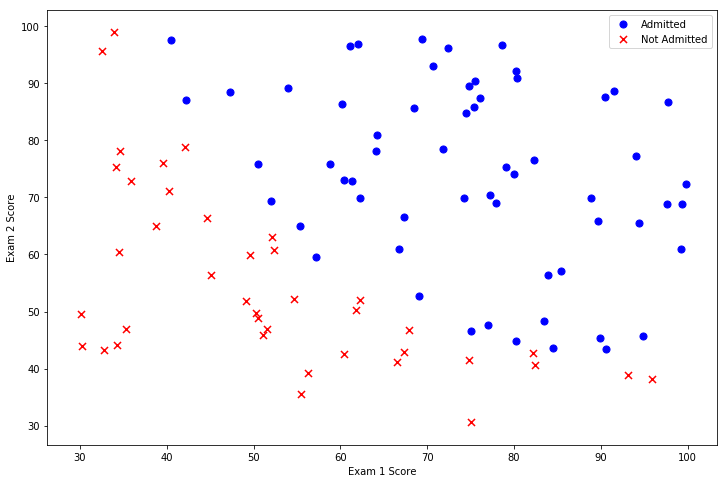

In [8]:
positive = data[data['Admitted'] == 1]
negative = data[data['Admitted'] == 0]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s = 50, c = 'b', marker = 'o', label = 'Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s = 50, c = 'r', marker = 'x', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [9]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]
X = X.values
y = y.values

In [11]:
print(X.shape)
print(y.shape)

(100, 3)
(100, 1)


In [12]:
from sklearn import linear_model

model = linear_model.LogisticRegression(penalty = 'l2', C = 1.0)
model.fit(X, y.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
model.score(X, y)

0.91

In [2]:
data2 = pd.read_csv('ex2data2.txt', header = None, names = ['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
data2.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Text(0,0.5,'Test 2 Score')

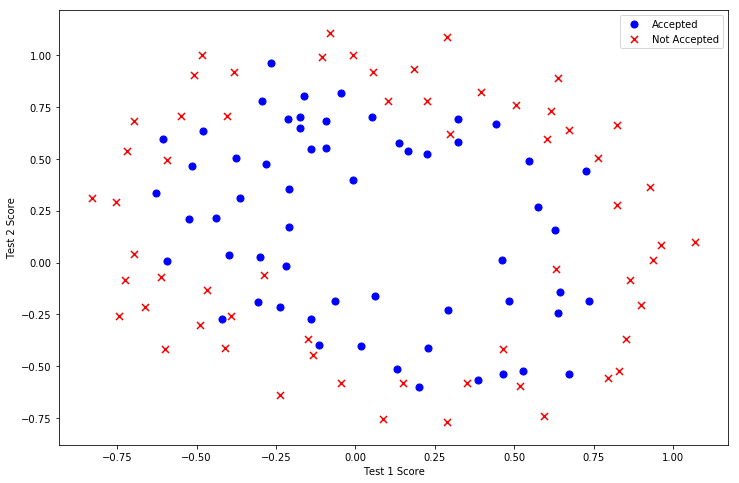

In [16]:
positive = data2[data2['Accepted'] == 1]
negative = data2[data2['Accepted'] == 0]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(positive['Test 1'], positive['Test 2'], s = 50, c = 'b', marker = 'o', label = 'Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s = 50, c = 'r', marker = 'x', label = 'Not Accepted')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [4]:
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [5]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = X2.values
y2 = y2.values

In [152]:
model = linear_model.LogisticRegression(penalty = 'l2', C = 100000)
model.fit(X2, y2.ravel())

LogisticRegression(C=100000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [153]:
model.score(X2, y2)

0.7711864406779662

In [154]:
model.coef_

array([[  0.18029733,  -3.19477484,  18.8749496 ,  -4.28488846,
         18.11614835,  20.23862626,   8.85505953, -43.55700562,
        -17.73494958, -50.50547811,  -2.74822484]])